<a href="https://colab.research.google.com/github/AbhishekRP2002/ML-AI-Notes-and-Self-Parctice/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation to address Overfitting and to train the model better (Incomplete Notes)

### We will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

**You'll learn a trick that can give a boost to your image classifiers: it's called data augmentation.**
The Usefulness of Fake Data
The best way to improve the performance of a machine learning model is to train it on more data. The more examples the model has to learn from, the better it will be able to recognize which differences in images matter and which do not. More data helps the model to generalize better.

One easy way of getting more data is to use the data you already have. If we can transform the images in our dataset in ways that preserve the class, we can teach our classifier to ignore those kinds of transformations. For instance, whether a car is facing left or right in a photo doesn't change the fact that it is a Car and not a Truck. So, if we augment our training data with flipped images, our classifier will learn that "left or right" is a difference it should ignore.

And that's the whole idea behind data augmentation: add in some extra fake data that looks reasonably like the real data and your classifier will improve.

**Using Data Augmentation**
* Typically, many kinds of transformation are used when augmenting a dataset. These might include rotating the image, adjusting the color or contrast, warping the image, or many other things, usually applied in combination. Here is a sample of the different ways a single image might be transformed.

In [ ]:
import matplotlib.pyplot as plt 
import cv2
import os 
import numpy as np
import tensorflow as tf
import PIL #Python Image Library

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
 ! pwd 

/content


In [ ]:
import pathlib

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [ ]:
roses = list(data_dir.glob('roses/'))
roses[:5]

[PosixPath('datasets/flower_photos/roses')]

In [ ]:
PIL.Image.open(str(roses[1]))

IndexError: ignored

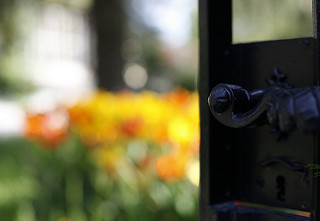

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}  #REading  flowers images from drive into numpy array using opencv

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16258946661_f9739cdc0a.jpg'),
 PosixPath('datasets/flower_photos/roses/6163179241_f093f45d95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4256169180_55df2048a0.jpg'),
 PosixPath('datasets/flower_photos/roses/353897245_5453f35a8e.jpg'),
 PosixPath('datasets/flower_photos/roses/5156037859_1673720a11_m.jpg')]

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(333, 500, 3)

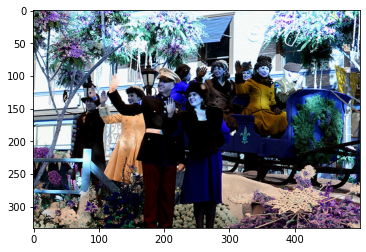

In [ ]:
plt.imshow(img)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])